<a href="https://colab.research.google.com/github/splf-jojo/mlp-mnist/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Форма обучающего массива: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Тип данных: uint8


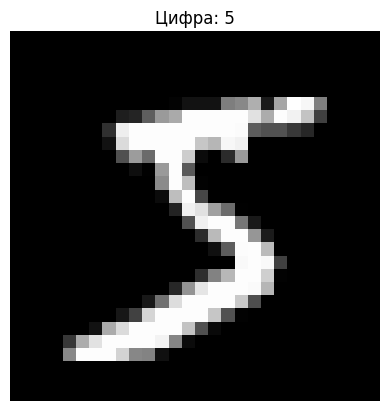

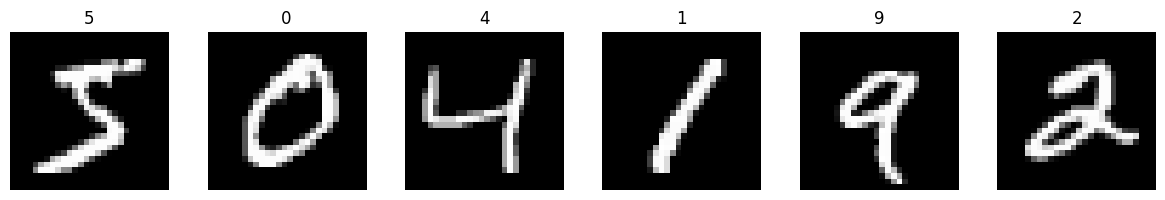

(60000, 784) (60000,)


In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# убедимся в форме и типе данных
print("Форма обучающего массива:", X_train.shape)        # (60000, 28, 28)
print("Тип данных:", X_train.dtype)                      # uint8

# выводим одно изображение и его метку
idx = 0                                                  # номер картинки
plt.imshow(X_train[idx], cmap='gray')                    # серое изображение
plt.title(f"Цифра: {y_train[idx]}")
plt.axis('off')
plt.show()

# если нужны ещё несколько картинок — сделаем маленькую витрину
n = 6
fig, axes = plt.subplots(1, n, figsize=(n*2, 2))
for i in range(n):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0

print(X_train.shape, y_train.shape)  # (60000, 784) (60000,)


In [ ]:
class MultiClassPerceptron:
    def __init__(self, n_features, n_classes, eta=0.1):
        self.k = n_classes # классы 10
        self.d = n_features # входные данные inputs 784
        self.W = np.zeros((self.k, self.d)) # создаем матрицу [10, 784]
        self.b = np.zeros(self.k) # создаем матрицу
        self.eta = eta

    def _score(self, x):
        return self.W @ x + self.b

    def predict(self, X):
        if X.ndim == 1:
            return self._score(X).argmax()
        # X_test = X 60 000 изображений 28 × 28
        # .T меняет порядок всех осей на обратный:

        return (self.W @ X.T + self.b[:, None]).argmax(0)  # батч

    def fit(self, X, y, epochs=30, shuffle=True, seed=42):
        rng = np.random.default_rng(seed)


        for epoch in range(1, epochs + 1):
            idx = np.arange(len(y))
            if shuffle:
                rng.shuffle(idx)

            errors = 0
            for i in idx:
                xi, ti = X[i], y[i]
                yi = self._score(xi).argmax()
                if yi != ti:
                    self.W[ti]     += self.eta * xi
                    self.W[yi]     -= self.eta * xi
                    self.b[ti]     += self.eta
                    self.b[yi]     -= self.eta
                    errors += 1
            print(f"epoch {epoch:<2d} errors: {errors}")
            if errors == 0:
                break

    def accuracy(self, X, y):
        return (self.predict(X) == y).mean()




perc = MultiClassPerceptron(n_features=784, n_classes=10, eta=0.1)
perc.fit(X_train, y_train, epochs=30)

print(f"\nAccuracy train: {perc.accuracy(X_train, y_train):.3f}")
print(f"Accuracy test : {perc.accuracy(X_test,  y_test ):.3f}")



epoch 1  errors: 9097
epoch 2  errors: 7661
epoch 3  errors: 7400
epoch 4  errors: 7114
epoch 5  errors: 7190
epoch 6  errors: 7053
epoch 7  errors: 6979
epoch 8  errors: 6868
epoch 9  errors: 6818
epoch 10 errors: 6926
epoch 11 errors: 6675
epoch 12 errors: 6739
epoch 13 errors: 6806
epoch 14 errors: 6695
epoch 15 errors: 6749
epoch 16 errors: 6663
epoch 17 errors: 6717
epoch 18 errors: 6579
epoch 19 errors: 6641
epoch 20 errors: 6616
epoch 21 errors: 6663
epoch 22 errors: 6644
epoch 23 errors: 6648
epoch 24 errors: 6568
epoch 25 errors: 6535
epoch 26 errors: 6608
epoch 27 errors: 6502
epoch 28 errors: 6553
epoch 29 errors: 6534
epoch 30 errors: 6557

Accuracy train: 0.890
Accuracy test : 0.882


In [ ]:
import numpy as np

perc = MultiClassPerceptron(
        n_features=784,
        n_classes =10,
        eta       =0.05      # шаг лучше немного меньше
)

perc.fit(X_train, y_train, epochs=30)
print(f"\nAccuracy train: {perc.accuracy(X_train, y_train):.3f}")
print(f"Accuracy test : {perc.accuracy(X_test , y_test ):.3f}")



NameError: name 'MultiClassPerceptron' is not defined

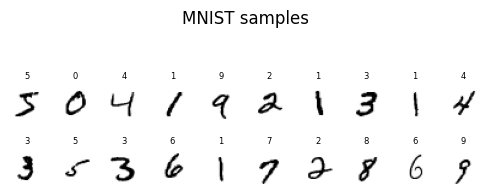

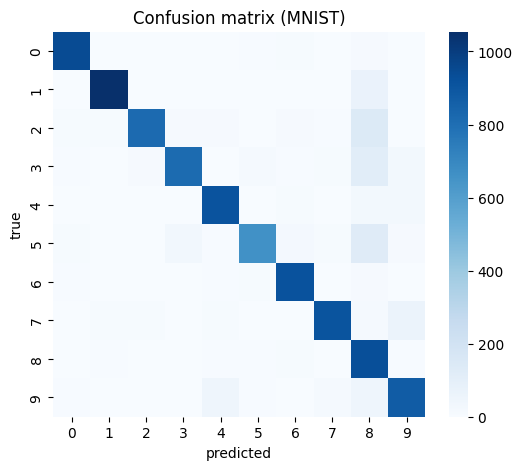

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# первые 20 картинок
plt.figure(figsize=(5,2))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray_r')
    plt.title(int(y_train[i]), fontsize=6)
    plt.axis('off')
plt.suptitle("MNIST samples", y=1.05)
plt.tight_layout()

# confusion-matrix
cm = confusion_matrix(y_test, perc.predict(X_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel("predicted"); plt.ylabel("true"); plt.title("Confusion matrix (MNIST)")
plt.show()


In [ ]:
import numpy as np

class SimpleMLP:
    """
    Двухслойный MLP: 784 -> n_hidden -> 10
    Активация: ReLU, Выход: softmax
    Оптимизатор: стох. градиентный спуск (SGD)
    """

    def __init__(self, n_features=784, n_hidden=128, n_classes=10, lr=1e-2, seed=42):
        rng = np.random.default_rng(seed)

        # He‑инициализация (sqrt(2/fan_in))
        self.W1 = rng.normal(0, np.sqrt(2 / n_features), size=(n_hidden, n_features))
        self.b1 = np.zeros(n_hidden)

        self.W2 = rng.normal(0, np.sqrt(2 / n_hidden), size=(n_classes, n_hidden))
        self.b2 = np.zeros(n_classes)

        self.lr = lr

    # ────────────────────────────────────────────
    # Служебные функции
    @staticmethod
    def _relu(z):
        return np.maximum(0, z)

    @staticmethod
    def _relu_grad(z):
        return (z > 0).astype(float)

    @staticmethod
    def _softmax(z):
        # числовая стабильность: вычитаем max по строке
        z_shift = z - z.max(axis=0, keepdims=True)
        exp = np.exp(z_shift)
        return exp / exp.sum(axis=0, keepdims=True)

    # ────────────────────────────────────────────
    # Прямой проход: возвращаем все промежуточные тензоры для back‑prop
    def _forward(self, x):
        """x shape: (d,)"""
        z1 = self.W1 @ x + self.b1          # (h,)
        a1 = self._relu(z1)                 # (h,)
        z2 = self.W2 @ a1 + self.b2         # (k,)
        y_hat = self._softmax(z2[:, None])  # (k,1) — приведём к колонке
        return z1, a1, z2, y_hat.squeeze()  # (k,)

    # ────────────────────────────────────────────
    # Обучение
    def fit(self, X, y, epochs=10, batch_size=64, verbose=True, seed=42):
        rng = np.random.default_rng(seed)
        n_samples = X.shape[0]
        k = self.W2.shape[0]

        # one‑hot представление классов
        Y_onehot = np.eye(k)[y]  # shape (n_samples, k)

        for epoch in range(1, epochs + 1):
            # перемешиваем выборку
            idx = rng.permutation(n_samples)
            X, Y_onehot = X[idx], Y_onehot[idx]

            for start in range(0, n_samples, batch_size):
              # Генерирует последовательность индексов начала мини‑батча: 0, batch_size, 2·batch_size, …. Например при n_samples = 60 000 и batch_size = 64 получится 0, 64, 128, …, 59 936.
                Xb = X[start:start+batch_size]          # (bs, d) пачка картинок
                Yb = Y_onehot[start:start+batch_size]   # (bs, k) пачка ответов что за

                # d = n_features = 784 — число входных признаков (пикселей).
                # h = n_hidden (например 128) — число нейронов скрытого слоя.
                # k = n_classes = 10 — число выходных классов.
                # bs = batch_size — фактический размер текущего мини‑батча (len(Xb)).
                #	W1 (h, d) 	Весовая матрица первого слоя: строка → нейрон, столбец → признак.

                # ---- прямой проход на батче ----
                z1 = self.W1 @ Xb.T + self.b1[:, None]  # (h, bs) сырое а1
                a1 = self._relu(z1)                     # (h, bs) активации скрытого слоя нейронов для батча картинок
                z2 = self.W2 @ a1 + self.b2[:, None]    # (k, bs)
                y_hat = self._softmax(z2)               # (k, bs) активации выходного слоя нейронов для батча картинок

                # ---- градиенты (softmax + CE) ----
                delta2 = y_hat - Yb.T                   # (k, bs) как сильно каждый логит завысил/занизил правильную вероятность

                grad_W2 = delta2 @ a1.T / batch_size    # (k, h)
                grad_b2 = delta2.mean(axis=1)           # (k,)

                # self.W2.T @ delta2
                # насколько (и в какую сторону) «виноваты» активации скрытого слоя в текущей ошибке

                # _relu_grad(z1)
                # говорит, через какие нейроны действительно должен пройти градиент
                # защищает веса от бессмысленных изменений там, где нейрон был выключен


                delta1 = (self.W2.T @ delta2) * self._relu_grad(z1)  # (h, bs)

                grad_W1 = delta1 @ Xb / batch_size      # (h, d)
                grad_b1 = delta1.mean(axis=1)           # (h,)

                # ---- обновление весов ----
                self.W2 -= self.lr * grad_W2
                self.b2 -= self.lr * grad_b2
                self.W1 -= self.lr * grad_W1
                self.b1 -= self.lr * grad_b1

            if verbose:
                acc = self.accuracy(X, y)
                print(f"Epoch {epoch:2d}: acc={acc:.4f}")

    # ────────────────────────────────────────────
    # Предсказание
    def predict(self, X):
        z1 = self.W1 @ X.T + self.b1[:, None]
        a1 = self._relu(z1)
        z2 = self.W2 @ a1 + self.b2[:, None]
        y_hat = self._softmax(z2)
        return y_hat.argmax(axis=0)          # (n_samples,)

    def accuracy(self, X, y):
        return (self.predict(X) == y).mean()


In [ ]:
from tensorflow.keras.datasets import mnist

# 1) Загружаем и приводим изображения к вектору 784
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 28*28).astype('float32')  / 255.0

# 2) Обучаем
mlp = SimpleMLP(n_hidden=128, lr=0.01)
mlp.fit(X_train, y_train, epochs=10, batch_size=128)

# 3) Оцениваем
print(f"Train accuracy: {mlp.accuracy(X_train, y_train):.3f}")
print(f"Test  accuracy: {mlp.accuracy(X_test,  y_test ):.3f}")


Epoch  1: acc=0.0984
Epoch  2: acc=0.0998
Epoch  3: acc=0.1008
Epoch  4: acc=0.1027
Epoch  5: acc=0.1002
Epoch  6: acc=0.1018
Epoch  7: acc=0.0995
Epoch  8: acc=0.0991
Epoch  9: acc=0.1008
Epoch 10: acc=0.1009
Train accuracy: 0.922
Test  accuracy: 0.925


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Загружаем и подготавливаем данные
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# приводим к float32 и нормируем в [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test .astype('float32') / 255.0
# добавляем канал
x_train = x_train[..., tf.newaxis]  # shape (60000,28,28,1)
x_test  = x_test [..., tf.newaxis]

# 2. Строим модель
model = models.Sequential([
    # — Conv блок 1
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=2),        # 28×28→14×14

    # — Conv блок 2
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),        # 14×14→6×6

    # — Flatten + Dense
    layers.Flatten(),                        # 6×6×64 → 2304
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),                     # регуляризация

    # — Выходной слой
    layers.Dense(10, activation='softmax')
])

# 3. Компилируем
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Обучаем
history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=128,
    validation_split=0.1  # 10% на валидацию
)

# 5. Оцениваем
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.6625 - loss: 0.9598 - val_accuracy: 0.8522 - val_loss: 0.4023
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.8391 - loss: 0.4435 - val_accuracy: 0.8772 - val_loss: 0.3402
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.8642 - loss: 0.3735 - val_accuracy: 0.8863 - val_loss: 0.3058
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.8759 - loss: 0.3416 - val_accuracy: 0.8948 - val_loss: 0.2825
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.8865 - loss: 0.3142 - val_accuracy: 0.8988 - val_loss: 0.2682
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.8954 - loss: 0.2928 - val_accuracy: 0.8905 - val_loss: 0.2909
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.8965 - loss: 0.2798 - val_accuracy: 0.9035 - val_loss: 0.2626
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9038 - loss: 0.2641 - 

In [ ]:
import numpy as np

# ---------- служебные функции im2col / col2im ----------
def im2col(X, k, stride, pad):
    """
    Преобразует 4-D тензор (N, C, H, W) в матрицу патчей (N, L, C*k*k),
    где L = out_h * out_w — кол-во позиций свёртки.
    """
    N, C, H, W = X.shape
    out_h = (H + 2*pad - k) // stride + 1
    out_w = (W + 2*pad - k) // stride + 1

    X_padded = np.pad(X, ((0,0), (0,0), (pad,pad), (pad,pad)))
    cols = np.zeros((N, C, k, k, out_h, out_w))

    for i in range(k):
        i_max = i + stride*out_h
        for j in range(k):
            j_max = j + stride*out_w
            cols[:, :, i, j, :, :] = X_padded[:, :, i:i_max:stride, j:j_max:stride]

    cols = cols.reshape(N, C*k*k, out_h*out_w).transpose(0, 2, 1)  # (N, L, Ckk)
    return cols, (out_h, out_w)


def col2im(cols, X_shape, k, stride, pad, out_hw):
    """
    Обратное преобразование патчей в градиент по входу (dX).
    """
    N, C, H, W = X_shape
    out_h, out_w = out_hw
    cols = cols.transpose(0, 2, 1).reshape(N, C, k, k, out_h, out_w)

    dX_padded = np.zeros((N, C, H + 2*pad, W + 2*pad))

    for i in range(k):
        i_max = i + stride*out_h
        for j in range(k):
            j_max = j + stride*out_w
            dX_padded[:, :, i:i_max:stride, j:j_max:stride] += cols[:, :, i, j, :, :]

    if pad == 0:
        return dX_padded
    return dX_padded[:, :, pad:-pad, pad:-pad]


# ---------- сам слой Conv2D ----------
class Conv2D:
    def __init__(self, in_channels, out_channels, kernel_size,
                 stride=1, padding=0, seed=None):
        rng = np.random.default_rng(seed)
        # инициализация по He (sqrt(2/fan_in))
        scale = np.sqrt(2 / (in_channels * kernel_size * kernel_size))
        self.W = rng.normal(scale=scale,
                            size=(out_channels, in_channels, kernel_size, kernel_size))
        self.b = np.zeros(out_channels)

        self.stride = stride
        self.pad = padding
        self.k = kernel_size

        # Градиенты будут храниться здесь после backward
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)

    def forward(self, X):
        """
        X: (N, C_in, H, W)
        -------------
        returns Y: (N, C_out, H', W')
        """
        self.X_shape = X.shape
        cols, (out_h, out_w) = im2col(X, self.k, self.stride, self.pad)
        self.cols = cols                      # сохраняем для backward

        W_col = self.W.reshape(self.W.shape[0], -1)   # (C_out, C_in*k*k)
        out = np.matmul(cols, W_col.T) + self.b       # (N, L, C_out)
        out = out.transpose(0, 2, 1).reshape(
            X.shape[0], self.W.shape[0], out_h, out_w)

        self.out_hw = (out_h, out_w)
        return out

    def backward(self, dY):
        """
        dY: (N, C_out, H', W')
        -------------
        возвращает dX той же формы, что и вход X
        также заполняет self.dW и self.db
        """
        N, C_out, H_out, W_out = dY.shape
        dY_resh = dY.reshape(N, C_out, -1).transpose(0, 2, 1)  # (N, L, C_out)

        # --- градиент по весам ---
        # sum_N (dY_L x cols_Ckk)^T   -> (C_out, C_in*k*k)
        self.dW = np.tensordot(dY_resh, self.cols, axes=([0,1], [0,1]))
        self.dW = self.dW.reshape(self.W.shape)

        # --- градиент по биасам ---
        self.db = dY.sum(axis=(0, 2, 3))

        # --- градиент по входу ---
        W_col = self.W.reshape(C_out, -1)            # (C_out, Ckk)
        dX_cols = np.matmul(dY_resh, W_col)          # (N, L, Ckk)
        dX = col2im(dX_cols, self.X_shape, self.k,
                    self.stride, self.pad, self.out_hw)
        return dX


In [ ]:
# cnn_numpy_fashion_mnist.py
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# ============ СЛУЖЕБНЫЕ ФУНКЦИИ =============================================
def im2col(X, k, stride, pad):
    N, C, H, W = X.shape
    out_h = (H + 2*pad - k) // stride + 1
    out_w = (W + 2*pad - k) // stride + 1
    X_p = np.pad(X, ((0,0), (0,0), (pad,pad), (pad,pad)))
    cols = np.zeros((N, C, k, k, out_h, out_w), dtype=X.dtype)

    for i in range(k):
        i_max = i + stride*out_h
        for j in range(k):
            j_max = j + stride*out_w
            cols[:, :, i, j, :, :] = X_p[:, :, i:i_max:stride, j:j_max:stride]

    cols = cols.reshape(N, C*k*k, -1).transpose(0, 2, 1)  # (N, L, Ck²)
    return cols, (out_h, out_w)


def col2im(cols, X_shape, k, stride, pad, out_hw):
    N, C, H, W = X_shape
    out_h, out_w = out_hw
    cols = cols.transpose(0, 2, 1).reshape(N, C, k, k, out_h, out_w)

    dX_p = np.zeros((N, C, H + 2*pad, W + 2*pad))
    for i in range(k):
        i_max = i + stride*out_h
        for j in range(k):
            j_max = j + stride*out_w
            dX_p[:, :, i:i_max:stride, j:j_max:stride] += cols[:, :, i, j]

    return dX_p[:, :, pad:pad+H, pad:pad+W]


# ============ СЛОИ ==========================================================
class Conv2D:
    def __init__(self, in_c, out_c, k=3, stride=1, pad=1, seed=None):
        rng = np.random.default_rng(seed)
        self.W = rng.normal(0, np.sqrt(2/(in_c*k*k)), size=(out_c, in_c, k, k))
        self.b = np.zeros(out_c)
        self.k, self.stride, self.pad = k, stride, pad
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)

    def forward(self, X):
        self.X_shape = X.shape
        self.cols, self.out_hw = im2col(X, self.k, self.stride, self.pad)
        W_col = self.W.reshape(self.W.shape[0], -1)              # (out_c, in_c*k*k)
        out = self.cols @ W_col.T + self.b                       # (N, L, out_c)
        N, L, C = out.shape
        out = out.transpose(0, 2, 1).reshape(N, C, *self.out_hw) # (N, out_c, H', W')
        return out

    def backward(self, dY):
        N, C_out, H_out, W_out = dY.shape
        dY_r = dY.reshape(N, C_out, -1).transpose(0, 2, 1)        # (N, L, C_out)

        # ∂L/∂W и ∂L/∂b
        self.dW = np.tensordot(dY_r, self.cols, axes=([0,1],[0,1])).reshape(self.W.shape)
        self.db = dY.sum(axis=(0, 2, 3))

        # ∂L/∂X
        W_col = self.W.reshape(C_out, -1)
        dX_cols = dY_r @ W_col                                    # (N, L, Ck²)
        dX = col2im(dX_cols, self.X_shape, self.k, self.stride, self.pad, self.out_hw)
        return dX


class ReLU:
    def forward(self, X):
        self.mask = X > 0
        return X * self.mask

    def backward(self, dY):
        return dY * self.mask


class MaxPool2D:
    def __init__(self, k=2, stride=2):
        self.k = k
        self.stride = stride

    def forward(self, X):
        N, C, H, W = X.shape
        self.X_shape = X.shape
        k, s = self.k, self.stride
        out_h = (H - k)//s + 1
        out_w = (W - k)//s + 1
        X_resh = X.reshape(N, C, H//k, k, W//k, k)
        out = X_resh.max(axis=(3,5))
        # mask для backward
        self.argmax = (X_resh == out[:, :, :, None, :, None])
        return out

    def backward(self, dY):
        k = self.k

        # 1. Создаём пустой тензор той же формы, что self.argmax
        dX = np.zeros_like(self.argmax, dtype=dY.dtype)

        # 2. Расширяем dY до нужной формы «вручную»
        #    (N, C, H', 1, W', 1) -> (N, C, H', k, W', k)  при помощи broadcast_to
        dY_bc = np.broadcast_to(dY[:, :, :, None, :, None], dX.shape)

        # 3. Записываем градиент только в позиции максимумов
        dX[self.argmax] = dY_bc[self.argmax]

        # 4. Склеиваем назад до (N, C, H, W)
        N, C, Hk, _, Wk, _ = dX.shape
        return dX.reshape(N, C, Hk * k, Wk * k)


class Flatten:
    def forward(self, X):
        self.orig_shape = X.shape
        return X.reshape(X.shape[0], -1)

    def backward(self, dY):
        return dY.reshape(self.orig_shape)


class Dense:
    def __init__(self, in_dim, out_dim, seed=None):
        rng = np.random.default_rng(seed)
        self.W = rng.normal(0, np.sqrt(2/in_dim), size=(in_dim, out_dim))
        self.b = np.zeros(out_dim)
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)

    def forward(self, X):
        self.X = X
        return X @ self.W + self.b

    def backward(self, dY):
        self.dW = self.X.T @ dY
        self.db = dY.sum(axis=0)
        return dY @ self.W.T


class SoftmaxCE:               # softmax + cross‑entropy (один класс-истина)
    def forward(self, logits, y_true):
        shifted = logits - logits.max(axis=1, keepdims=True)
        exp = np.exp(shifted)
        self.probs = exp / exp.sum(axis=1, keepdims=True)
        N = logits.shape[0]
        loss = -np.log(self.probs[np.arange(N), y_true] + 1e-9).mean()
        self.y_true = y_true
        return loss

    def backward(self):
        N = self.probs.shape[0]
        grad = self.probs.copy()
        grad[np.arange(N), self.y_true] -= 1
        return grad / N


# ============ ОПТИМИЗАТОР ====================================================
class SGD:
    def __init__(self, layers, lr=1e-2):
        self.params = []
        for layer in layers:
            for name in ('W', 'b'):
                if hasattr(layer, name):
                    self.params.append((layer, name))
        self.lr = lr

    def step(self):
        for layer, name in self.params:
            W = getattr(layer, name)
            dW = getattr(layer, 'd'+name)
            setattr(layer, name, W - self.lr * dW)


# ============ СБОРКА СЕТИ =====================================================
class SimpleCNN:
    def __init__(self):
        self.layers = [
            Conv2D(1, 32, k=3, pad=1), ReLU(),
            MaxPool2D(2),
            Conv2D(32, 64, k=3, pad=1), ReLU(),
            MaxPool2D(2),
            Flatten(),
            Dense(7*7*64, 128), ReLU(),
            Dense(128, 10)
        ]
        self.loss_fn = SoftmaxCE()
        self.opt = SGD(self.layers, lr=1e-2)

    def forward(self, X, y):
        out = X
        for layer in self.layers:
            out = layer.forward(out)
        loss = self.loss_fn.forward(out, y)
        return loss, out

    def backward(self):
        grad = self.loss_fn.backward()
        # слои в обратном порядке
        for layer in reversed(self.layers):
            grad = layer.backward(grad)
        self.opt.step()

    def predict(self, X):
        out = X
        for layer in self.layers:
            out = layer.forward(out)
        return out.argmax(axis=1)


# ============ ОБУЧЕНИЕ И ТЕСТ ===============================================
def train(n_epochs=1, batch=512, train_samples=55120):
    # 1. Загрузка и подготовка данных
    (x_tr, y_tr), (x_te, y_te) = fashion_mnist.load_data()
    x_tr = x_tr[:train_samples].astype(np.float32) / 255.0
    y_tr = y_tr[:train_samples]
    x_te = x_te.astype(np.float32) / 255.0

    # (N, 1, 28, 28)
    x_tr = x_tr[:, None, :, :]
    x_te = x_te[:, None, :, :]

    net = SimpleCNN()

    # 2. Тренировка
    for epoch in range(1, n_epochs+1):
        idx = np.random.permutation(train_samples)
        total_loss = 0
        for i in range(0, train_samples, batch):
            batch_idx = idx[i:i+batch]
            loss, _ = net.forward(x_tr[batch_idx], y_tr[batch_idx])
            net.backward()
            total_loss += loss * len(batch_idx)
        print(f"Epoch {epoch}: loss = {total_loss/train_samples:.4f}")

    # 3. Тест
    preds = []
    for i in range(0, len(x_te), batch):
        preds.append(net.predict(x_te[i:i+batch]))
    preds = np.concatenate(preds)
    acc = (preds == y_te).mean()
    print(f"Test accuracy: {acc:.3f}")

train(n_epochs=2)     # увеличьте n_epochs для лучшего качества


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1: loss = 1.0127
Epoch 2: loss = 0.6994
Test accuracy: 0.767
